In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-classification/heart.csv


<div style="background-color: pink; color: #1434A4; border-radius: 32px; height:50px">
    <center><h1 style="display:block; padding:7px">TABLE OF CONTENTS 📚</h1></center>
</div>

#####  **1. IMPORTING LIBRARIES**
##### **2. LOADING DATA**
##### **3. DATA PREPROCESSING**
##### **4. DATA ANALYSIS**
##### **5. MODEL BUILDING**
##### **6. CONCLUSIONS**

<div style="background-color: pink; color: #1434A4; border-radius: 32px; height:50px">
    <center><h1 style="display:block; padding:7px">Importing required libraries 📚</h1></center>
</div>


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

<div style="background-color: pink; color: #1434A4; border-radius: 32px; height:50px">
    <center><h1 style="display:block; padding:7px">LOADING DATA 📚</h1></center>
</div>


In [4]:
data = pd.read_csv("/kaggle/input/heart-disease-classification/heart.csv")
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# since dataset is small, dropping age column as it will increase variability and add noise.
data.drop(['age'],axis=1,inplace=True)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain_type,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0


<div style="background-color: pink; color: #1434A4; border-radius: 32px; height:250px">
    <center><h1 style="display:block; padding:7px">DATA ANALYSIS 📚</h1></center>
    <left><h2 style="display:block; padding:1px">The analysis consist of:</h2></left>
    <left><h3 style="display:block">* Count Plot</h2></left>
    <left><h3 style="display:block">* Corelation Heat Map</h2></left>
    <left><h3 style="display:block; padding:1px">* Box Plot</h2></left>
</div>

<AxesSubplot: xlabel='target', ylabel='count'>

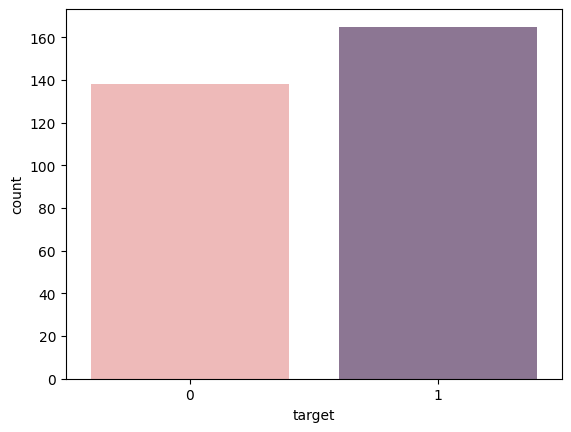

In [8]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="target",palette=colours)

<AxesSubplot: >

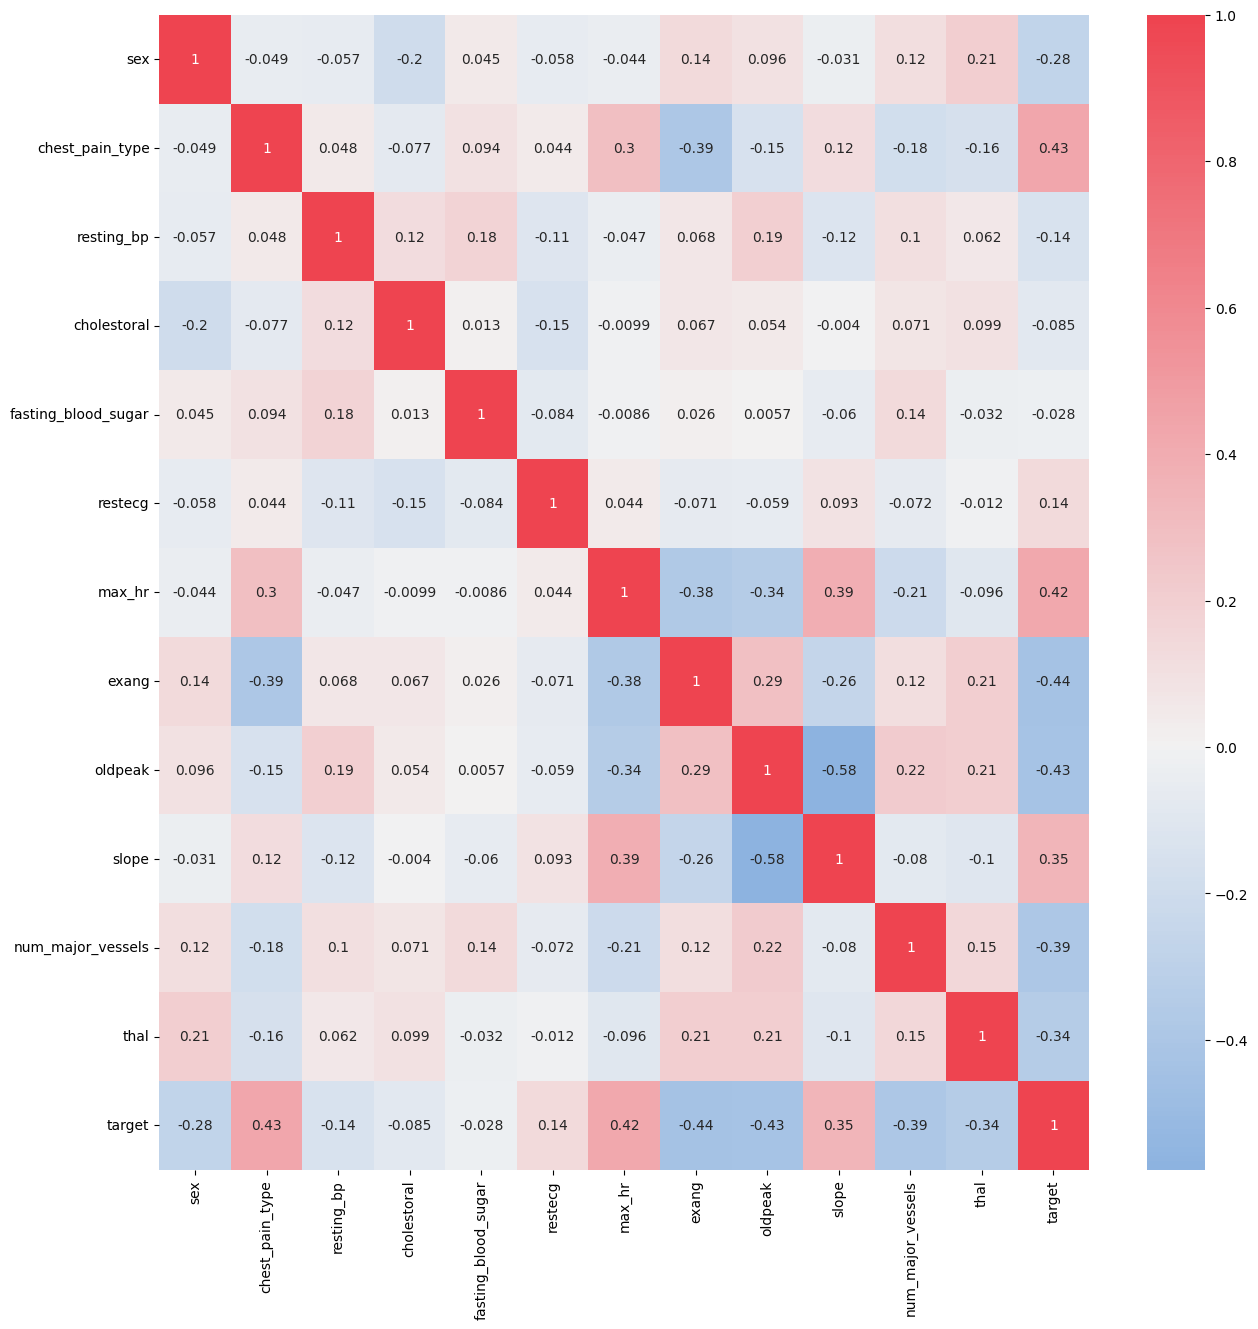

In [9]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

**slope Vs oldpeak by target**

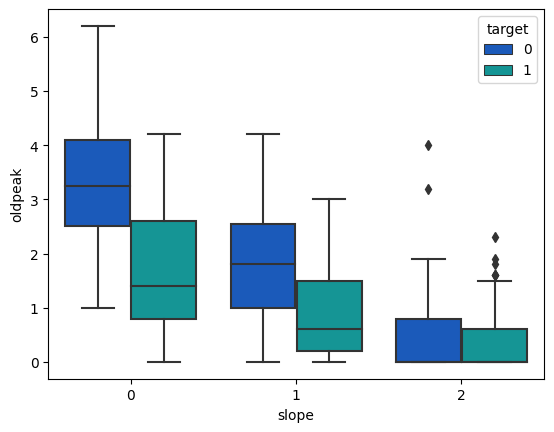

In [10]:
sns.boxplot(data =data,x="slope",y="oldpeak",palette='winter', hue="target")
plt.show()

**exang Vs max_hr by target**

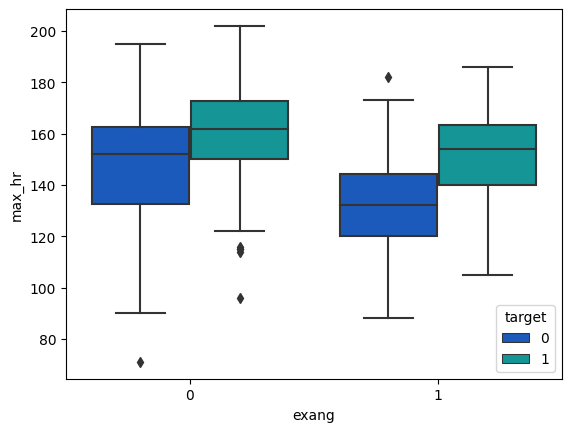

In [11]:
sns.boxplot(data =data,x="exang",y="max_hr",palette='winter', hue="target")
plt.show()

<div style="background-color: pink; color: #1434A4; border-radius: 32px; height:50px">
    <center><h1 style="display:block; padding:7px">MODEL SELECTION AND BUILDING</h1></center>
</div>


In this section we will:

1. Set up features(X) and target(Y)
2. Scale the features
3. Split training and test sets
4. Model selection
5. Hyperparameter tuning

In [12]:
#assigning values to features as X and target as y
X=data.drop(["target"],axis=1)
y=data["target"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
chest_pain_type,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
resting_bp,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
cholestoral,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fasting_blood_sugar,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
max_hr,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851
slope,303.0,-1.407015e-16,1.001654,-2.274579,-0.649113,-0.649113,0.976352,0.976352


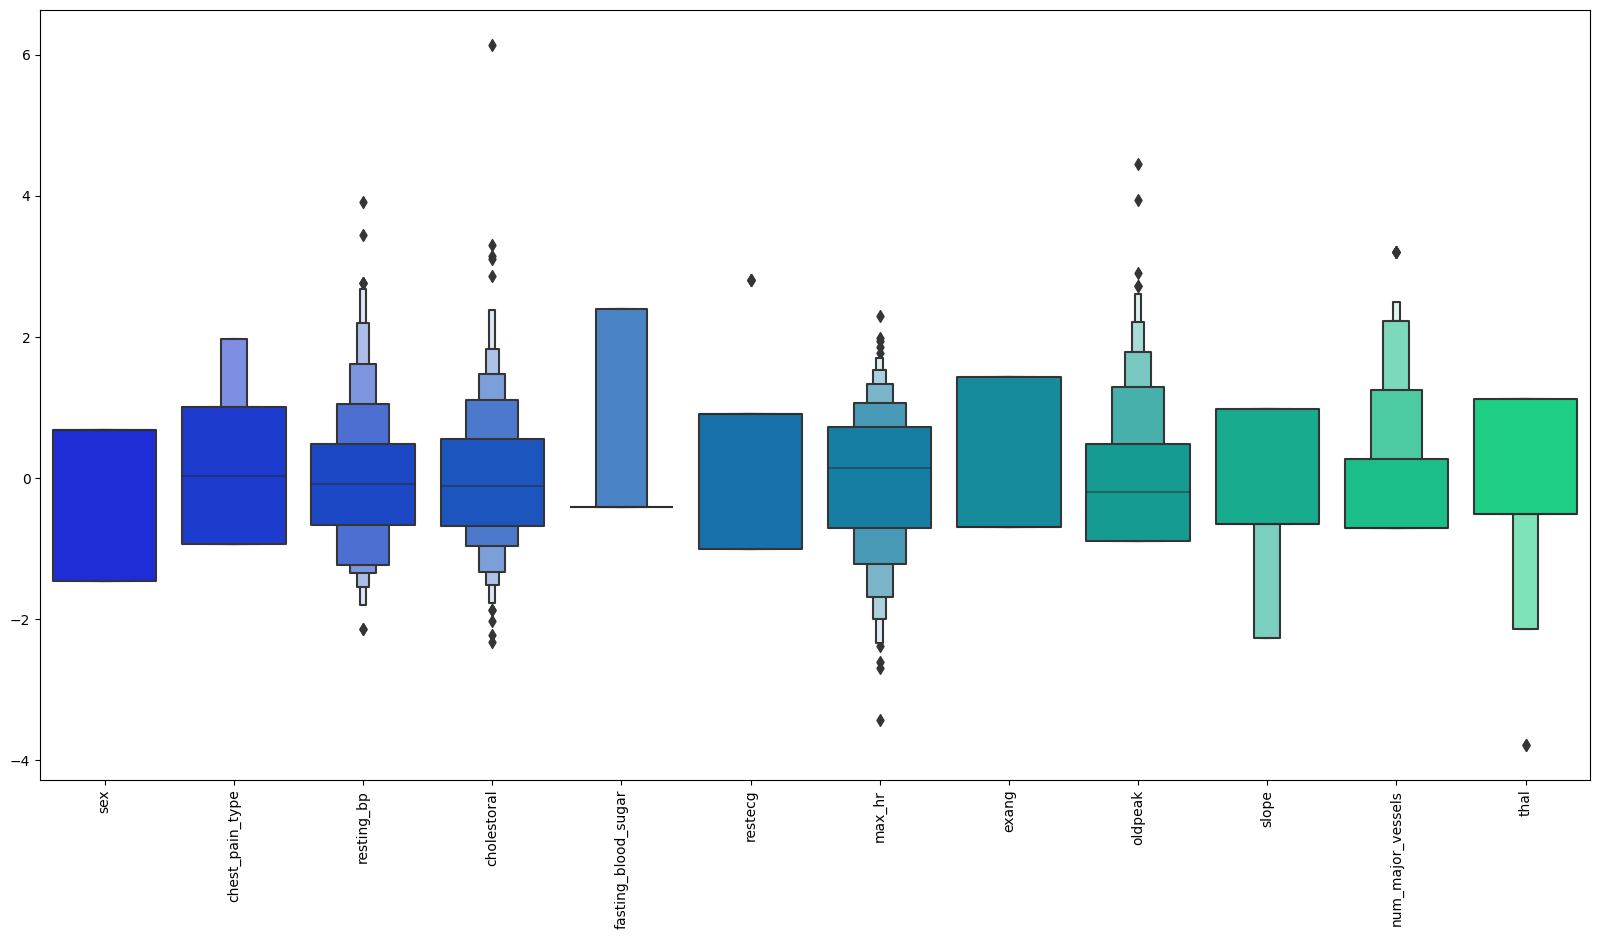

In [13]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = 'winter')
plt.xticks(rotation=90)
plt.show()

In [14]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [15]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.834416 
Decision Tree: 0.759307 
RandomForest: 0.834632 
SVC: 0.796753 


**So Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv. Let's find out how it performs on testset**

In [16]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8241758241758241


In [17]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 3)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 150}

In [18]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.8241758241758241

In [19]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.8241758241758241
Recall      :  0.8241758241758241
Precision   :  0.8240349394195549
F1 Score    :  0.8241758241758241


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



<AxesSubplot: >

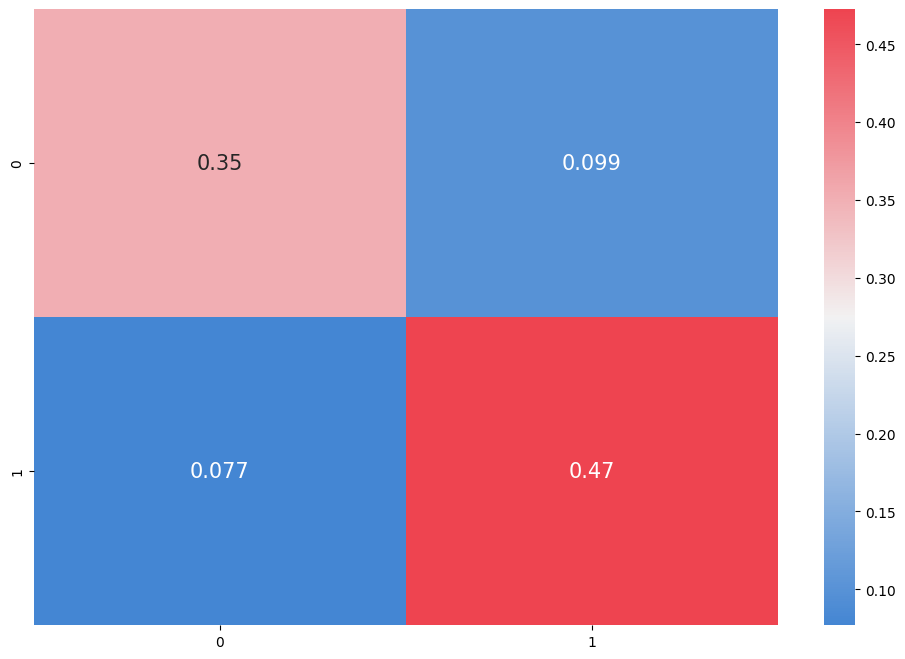

In [21]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<div style="background-color: pink; color: #1434A4; border-radius: 32px; height: 50px">
    <center><h1 style="display:block; padding:7px">I hope you like this!✌️</h1></center>
</div>
